# Import packages

In [1]:
import sys
import os
import io
import yfinance as yf  # For stock data
import pandas as pd    # For data manipulation
import numpy as np     # For numerical operations
import datetime
from datetime import timedelta
#!pip install tabulate
from tabulate import tabulate
#!pip install xlsxwriter


import matplotlib.pyplot as plt  # For visualizations
#!pip install statsmodels
import statsmodels.api as sm

import importlib

# Import stock data

In [2]:
try:
    importlib.reload(sys.modules['data.api_get_sp500_15m'])
except Exception as e:
    print('NO loaded libraries',  e)
    pass

from data.api_get_sp500_15m import apiGetStockData

apigetstockdata = apiGetStockData()
apigetstockdata.run()

outputs_dict = apigetstockdata.outputs_dict
data_e2_df = outputs_dict['data_e2_df'].copy()
data_e2_df

NO loaded libraries 'data.api_get_sp500_15m'


/home/user/Documents/airflow_predictive/dags/src/trading/data/api_get_sp500_15m.py:33: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_df = yf.download(self.ticker, interval=self.interval, period=self.period)
[*********************100%***********************]  1 of 1 completed
2025-09-30 21:28:51,701 - data.api_get_sp500_15m - INFO - 
WU -> Stock market data: (1560, 7)
2025-09-30 21:28:51,717 - data.api_get_sp500_15m - INFO - 
WU -> Last reported dates into the data:
          Date  candles              min_datetime              max_datetime  \
53  2025-09-22       26 2025-09-22 13:30:00+00:00 2025-09-22 19:45:00+00:00   
54  2025-09-23       26 2025-09-23 13:30:00+00:00 2025-09-23 19:45:00+00:00   
55  2025-09-24       26 2025-09-24 13:30:00+00:00 2025-09-24 19:45:00+00:00   
56  2025-09-25       26 2025-09-25 13:30:00+00:00 2025-09-25 19:45:00+00:00   
57  2025-09-26       26 2025-09-26 13:30:00+00:00 2025-09-26 19:45:00+00:00   
58  2025-09-29  

,index,Datetime,Close,High,Low,Open,Volume,Date,Time,Open_adj
0,0,2025-07-08 13:30:00+00:00,6232.700195,6234.600098,6227.529785,6234.029785,86566620,2025-07-08,1330,NaN
1,1,2025-07-08 13:45:00+00:00,6229.330078,6238.450195,6229.189941,6232.850098,112742105,2025-07-08,1345,6232.700195
2,2,2025-07-08 14:00:00+00:00,6225.680176,6231.069824,6221.509766,6228.100098,116476399,2025-07-08,1400,6229.330078
3,3,2025-07-08 14:15:00+00:00,6222.379883,6228.600098,6218.910156,6225.560059,113443376,2025-07-08,1415,6225.680176
4,4,2025-07-08 14:30:00+00:00,6232.339844,6236.839844,6222.220215,6222.410156,111699758,2025-07-08,1430,6222.379883
...,...,...,...,...,...,...,...,...,...,...
1555,1555,2025-09-30 18:45:00+00:00,6669.180176,6670.970215,6667.100098,6667.959961,72605000,2025-09-30,1845,6668.060059
1556,1556,2025-09-30 19:00:00+00:00,6671.370117,6673.419922,6669.020020,6669.149902,89894000,2025-09-30,1900,6669.180176
1557,1557,2025-09-30 19:15:00+00:00,6678.810059,6679.970215,6669.879883,6671.390137,99669000,2025-09-30,1915,6671.370117
1558,1558,2025-09-30 19:30:00+00:00,6674.950195,6682.100098,6673.759766,6678.810059,121574000,2025-09-30,1930,6678.810059


# Compute indicators

In [99]:
try:
    importlib.reload(sys.modules['logics.compute_strategies_indicators'])
except Exception as e:
    print('NO loaded libraries',  e)
    pass

from logics.compute_strategies_indicators import computeStrategiesIndicators


strategy = 'sp500_15m_v2'
computestrategiessndicators = computeStrategiesIndicators(strategy = strategy, inputs_dict = outputs_dict)
computestrategiessndicators.run()

outputs_dict = computestrategiessndicators.outputs_dict
data_e2_df = outputs_dict['data_e2_df'].copy()
data_e2_df

2025-09-30 21:49:38,893 - logics.compute_strategies_indicators - INFO - 
WU -> Report of slopes values:
    slope_bucket     min_s     max_s     avg_s  frequence
0              0 -0.007146 -0.000627 -0.001263        133
1              1 -0.000624 -0.000400 -0.000498        132
2              2 -0.000399 -0.000271 -0.000333        133
3              3 -0.000267 -0.000157 -0.000211        132
4              4 -0.000156 -0.000063 -0.000110        133
5              5 -0.000063  0.000019 -0.000026        132
6              6  0.000020  0.000119  0.000070        133
7              7  0.000121  0.000234  0.000177        132
8              8  0.000235  0.000403  0.000316        133
9              9  0.000404  0.000707  0.000535        132
10            10  0.000714  0.004582  0.001375        133



,index,Datetime,Close,High,Low,Open,Volume,Date,Time,Open_adj,...,open_price,order_number,order_step,strategy_gain,pp_max_gain,order_gain_balance,order_loss_balance,strategy_return,acum_strategy_gain,max_strategy_gain
0,0,2025-07-08 13:30:00+00:00,6232.700195,6234.600098,6227.529785,6234.029785,86566620,2025-07-08,1330,NaN,...,0.000000,0,1,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1,2025-07-08 13:45:00+00:00,6229.330078,6238.450195,6229.189941,6232.850098,112742105,2025-07-08,1345,6232.700195,...,0.000000,0,2,-0.000000,-1.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000
2,2,2025-07-08 14:00:00+00:00,6225.680176,6231.069824,6221.509766,6228.100098,116476399,2025-07-08,1400,6229.330078,...,0.000000,0,3,-0.000000,-1.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000
3,3,2025-07-08 14:15:00+00:00,6222.379883,6228.600098,6218.910156,6225.560059,113443376,2025-07-08,1415,6225.680176,...,0.000000,0,4,-0.000000,-1.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000
4,4,2025-07-08 14:30:00+00:00,6232.339844,6236.839844,6222.220215,6222.410156,111699758,2025-07-08,1430,6222.379883,...,0.000000,0,5,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1555,2025-09-30 18:45:00+00:00,6669.180176,6670.970215,6667.100098,6667.959961,72605000,2025-09-30,1845,6668.060059,...,6612.819824,62,65,1.120117,0.894609,151.790039,-95.429688,0.000168,56.360352,63.000000
1556,1556,2025-09-30 19:00:00+00:00,6671.370117,6673.419922,6669.020020,6669.149902,89894000,2025-09-30,1900,6669.180176,...,6612.819824,62,66,2.189941,0.929370,153.979980,-95.429688,0.000328,58.550293,63.000000
1557,1557,2025-09-30 19:15:00+00:00,6678.810059,6679.970215,6669.879883,6671.390137,99669000,2025-09-30,1915,6671.370117,...,6612.819824,62,67,7.439941,1.000000,161.419922,-95.429688,0.001115,65.990234,65.990234
1558,1558,2025-09-30 19:30:00+00:00,6674.950195,6682.100098,6673.759766,6678.810059,121574000,2025-09-30,1930,6678.810059,...,6612.819824,62,68,-3.859863,0.941509,161.419922,-99.289551,-0.000578,62.130371,65.990234


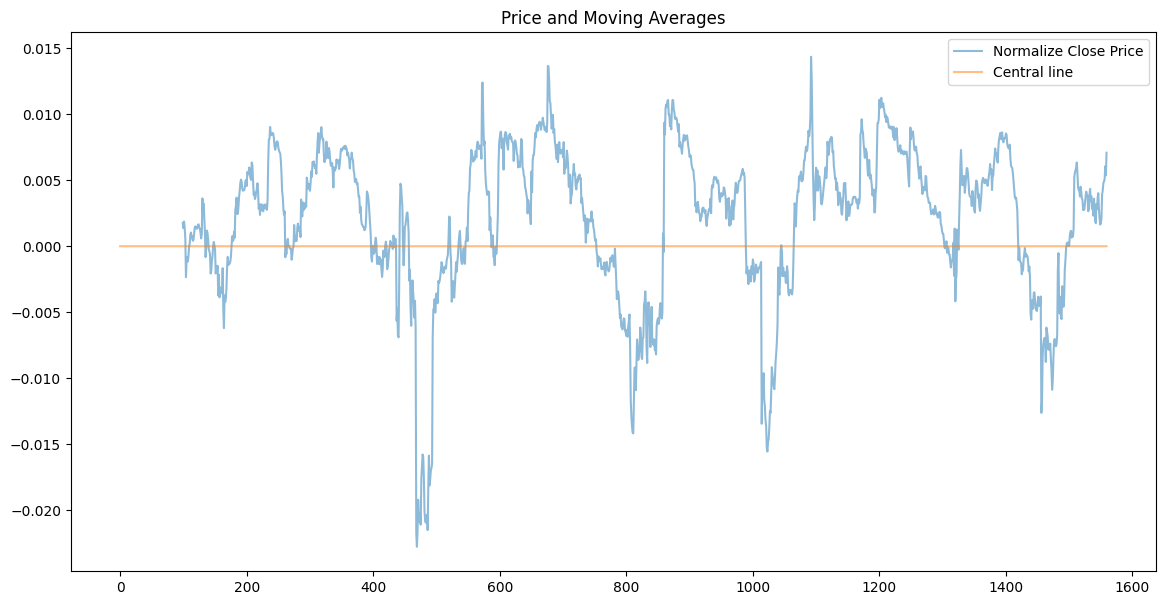

In [100]:
zeros_ls = [0] * len(data_e2_df['nclose'])



plt.figure(figsize=(14, 7))
plt.plot(data_e2_df['nclose'], label='Normalize Close Price', alpha=0.5)
plt.plot(zeros_ls, label='Central line', alpha=0.5)
plt.title(f"Price and Moving Averages")
plt.legend()
plt.show()

# Strategy implementation

In [182]:
try:
    importlib.reload(sys.modules['logics.strategies_implementation'])
except Exception as e:
    print('NO loaded libraries',  e)
    pass

from logics.strategies_implementation import strategiesImplementation


strategy = 'sp500_15m_v2'
strategiesimplementation = strategiesImplementation(strategy = strategy, inputs_dict = outputs_dict)
strategiesimplementation.run()

outputs_dict = strategiesimplementation.outputs_dict
data_e2_df = outputs_dict['data_e2_df'].copy()
data_e2_df

,index,Datetime,Close,High,Low,Open,Volume,Date,Time,Open_adj,...,open_price,order_number,order_step,strategy_gain,pp_max_gain,order_gain_balance,order_loss_balance,strategy_return,acum_strategy_gain,max_strategy_gain
0,0,2025-07-08 13:30:00+00:00,6232.700195,6234.600098,6227.529785,6234.029785,86566620,2025-07-08,1330,NaN,...,0.000000,0,1,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1,2025-07-08 13:45:00+00:00,6229.330078,6238.450195,6229.189941,6232.850098,112742105,2025-07-08,1345,6232.700195,...,0.000000,0,2,-0.000000,-1.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000
2,2,2025-07-08 14:00:00+00:00,6225.680176,6231.069824,6221.509766,6228.100098,116476399,2025-07-08,1400,6229.330078,...,0.000000,0,3,-0.000000,-1.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000
3,3,2025-07-08 14:15:00+00:00,6222.379883,6228.600098,6218.910156,6225.560059,113443376,2025-07-08,1415,6225.680176,...,0.000000,0,4,-0.000000,-1.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000
4,4,2025-07-08 14:30:00+00:00,6232.339844,6236.839844,6222.220215,6222.410156,111699758,2025-07-08,1430,6222.379883,...,0.000000,0,5,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1555,2025-09-30 18:45:00+00:00,6669.180176,6670.970215,6667.100098,6667.959961,72605000,2025-09-30,1845,6668.060059,...,6612.819824,68,65,1.120117,0.894609,151.790039,-95.429688,0.000168,56.360352,63.000000
1556,1556,2025-09-30 19:00:00+00:00,6671.370117,6673.419922,6669.020020,6669.149902,89894000,2025-09-30,1900,6669.180176,...,6612.819824,68,66,2.189941,0.929370,153.979980,-95.429688,0.000328,58.550293,63.000000
1557,1557,2025-09-30 19:15:00+00:00,6678.810059,6679.970215,6669.879883,6671.390137,99669000,2025-09-30,1915,6671.370117,...,6612.819824,68,67,7.439941,1.000000,161.419922,-95.429688,0.001115,65.990234,65.990234
1558,1558,2025-09-30 19:30:00+00:00,6674.950195,6682.100098,6673.759766,6678.810059,121574000,2025-09-30,1930,6678.810059,...,6612.819824,68,68,-3.859863,0.941509,161.419922,-99.289551,-0.000578,62.130371,65.990234


In [183]:
data_e2_df.value_counts(['signal'])

signal
 0        949
 1        552
-1         59
Name: count, dtype: int64

In [184]:
#data_e21_df = data_e2_df[(data_e2_df['index'] >= 200)&(data_e2_df['index'] <= 300)].copy()
#data_e21_df = data_e21_df.reset_index(drop=True).copy()

#outputs_dict['data_e2_df'] = data_e21_df.copy()
#data_e21_df

# Performance metrics

2025-10-01 12:19:29,248 - logics.performance_metrics - INFO - 
WU -> Data for compute performance of strategy:
(1494, 29)

2025-10-01 12:19:29,274 - logics.performance_metrics - INFO - WU ->
Total Strategy Return: 11.61%
Total Market Return: 7.01%



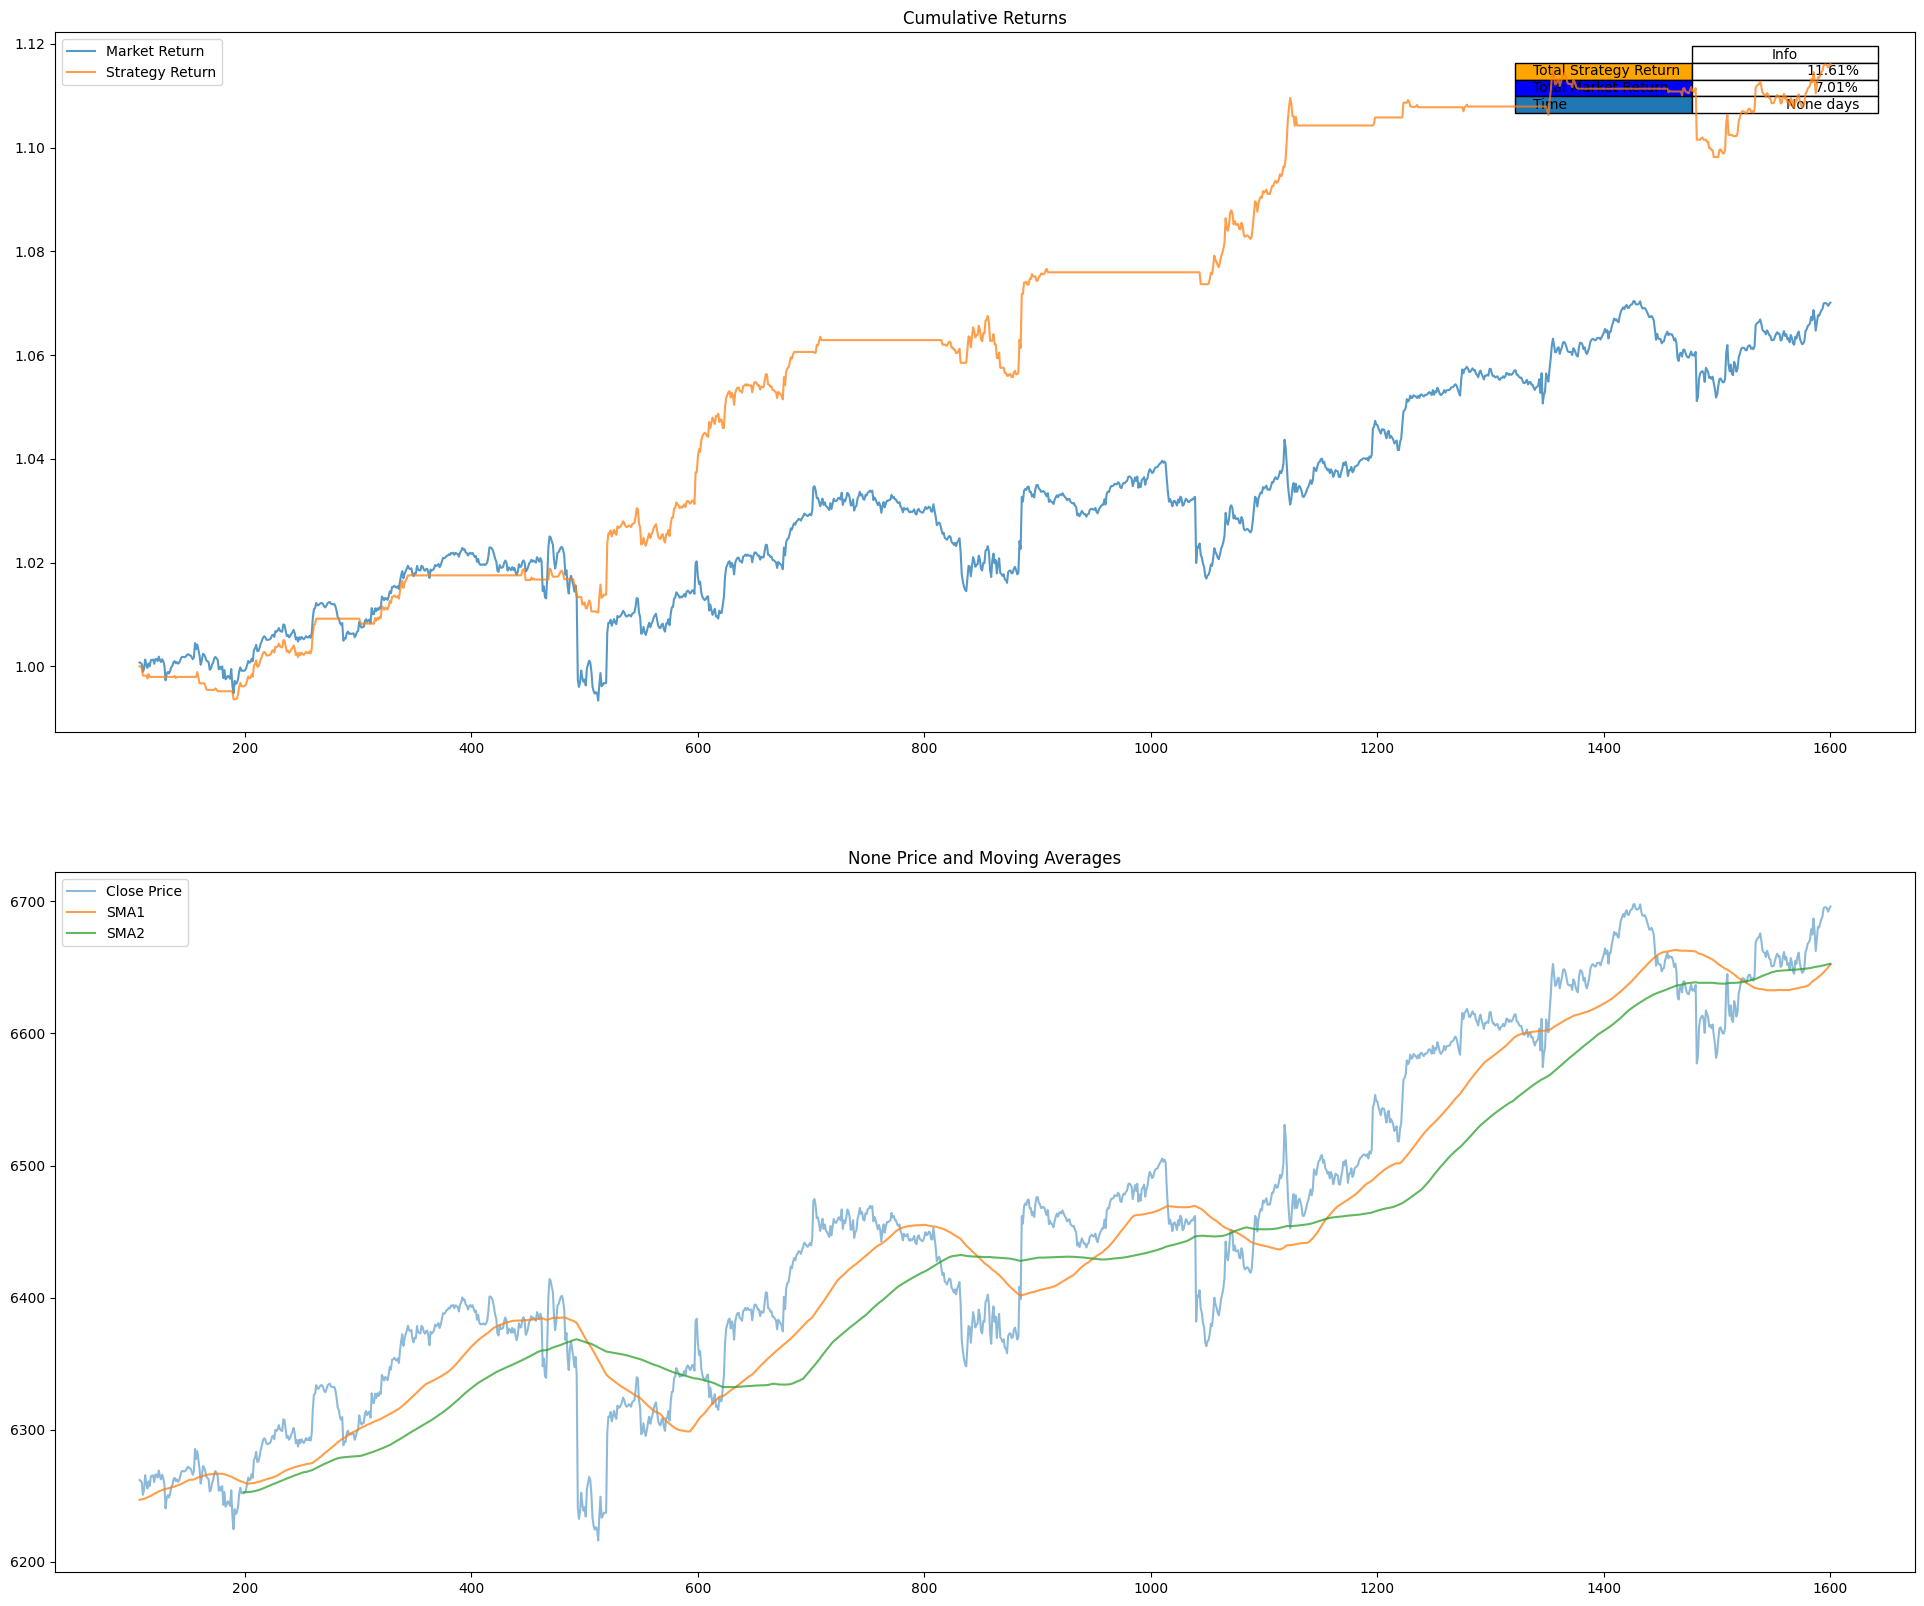

2025-10-01 12:19:30,716 - logics.performance_metrics - INFO - 
WU -> Operations profitability:
   is_profitable  oreders  gain_amount   gain_avg    candles
0          False       43  -282.200195  -6.562795   3.116279
1           True       26   986.589844  37.945763  21.769231

2025-10-01 12:19:30,718 - logics.performance_metrics - INFO - 
WU -> Strategy total gain points:(704.3896484375)

2025-10-01 12:19:30,718 - logics.performance_metrics - INFO - 
WU -> Market total gain points:(434.9296875)



,index,Datetime,Close,High,Low,Open,Volume,Date,Time,Open_adj,...,order_step,strategy_gain,pp_max_gain,order_gain_balance,order_loss_balance,strategy_return,acum_strategy_gain,max_strategy_gain,Cumulative Market Return,Cumulative Strategy Return
107,107,2025-07-11 14:15:00+00:00,6261.970215,6264.209961,6255.830078,6257.399902,95146792,2025-07-11,1415,6257.430176,...,1,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000726,1.000000
108,108,2025-07-11 14:30:00+00:00,6261.200195,6265.450195,6258.750000,6262.000000,88000877,2025-07-11,1430,6261.970215,...,2,-0.770020,-1.000000,0.000000,-0.770020,-0.000123,-0.770020,-0.770020,1.000602,0.999877
109,109,2025-07-11 14:45:00+00:00,6260.109863,6261.140137,6254.669922,6261.140137,84624542,2025-07-11,1445,6261.200195,...,3,-1.090332,2.415980,0.000000,-1.860352,-0.000174,-1.860352,-0.770020,1.000428,0.999703
110,110,2025-07-11 15:00:00+00:00,6250.729980,6260.120117,6250.640137,6260.120117,84228200,2025-07-11,1500,6260.109863,...,4,-9.379883,14.597337,0.000000,-11.240234,-0.001498,-11.240234,-0.770020,0.998929,0.998205
111,111,2025-07-11 15:15:00+00:00,6254.660156,6259.259766,6249.180176,6250.229980,79099177,2025-07-11,1515,6250.729980,...,5,0.000000,14.597337,0.000000,-11.240234,0.000000,-11.240234,-0.770020,0.999557,0.998205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1596,1596,2025-10-01 16:00:00+00:00,6695.540039,6697.120117,6693.959961,6695.629883,78729000,2025-10-01,1600,6695.600098,...,80,-0.060059,0.999274,207.359863,-124.639648,-0.000009,82.720215,82.780273,1.070014,1.115996
1597,1597,2025-10-01 16:15:00+00:00,6694.689941,6697.100098,6691.660156,6695.580078,76830000,2025-10-01,1615,6695.540039,...,81,-0.850098,0.989005,207.359863,-125.489746,-0.000127,81.870117,82.780273,1.069878,1.115854
1598,1598,2025-10-01 16:30:00+00:00,6692.209961,6695.990234,6691.689941,6694.600098,76996000,2025-10-01,1630,6694.689941,...,82,-2.479980,0.959047,207.359863,-127.969727,-0.000370,79.390137,82.780273,1.069482,1.115441
1599,1599,2025-10-01 16:45:00+00:00,6694.589844,6694.600098,6690.060059,6692.149902,68782000,2025-10-01,1645,6692.209961,...,83,2.379883,0.987796,209.739746,-127.969727,0.000356,81.770020,82.780273,1.069862,1.115838


In [230]:
try:
    importlib.reload(sys.modules['logics.performance_metrics'])
except Exception as e:
    print('NO loaded libraries',  e)
    pass

from logics.performance_metrics import performanceMetrics


strategy = 'sp500_15m'

params_dict = {}
#params_dict['interval'] = '15m'
#params_dict['days'] = 7
#params_dict['ticker'] = 'ĜSPC'

performancemetrics = performanceMetrics(inputs_dict = outputs_dict, params_dict=params_dict)
#performancemetrics = performanceMetrics(inputs_dict = outputs_dict)
performancemetrics.run()

outputs_dict = performancemetrics.outputs_dict
data_e_df = outputs_dict['data_e_df'].copy()
data_e_df

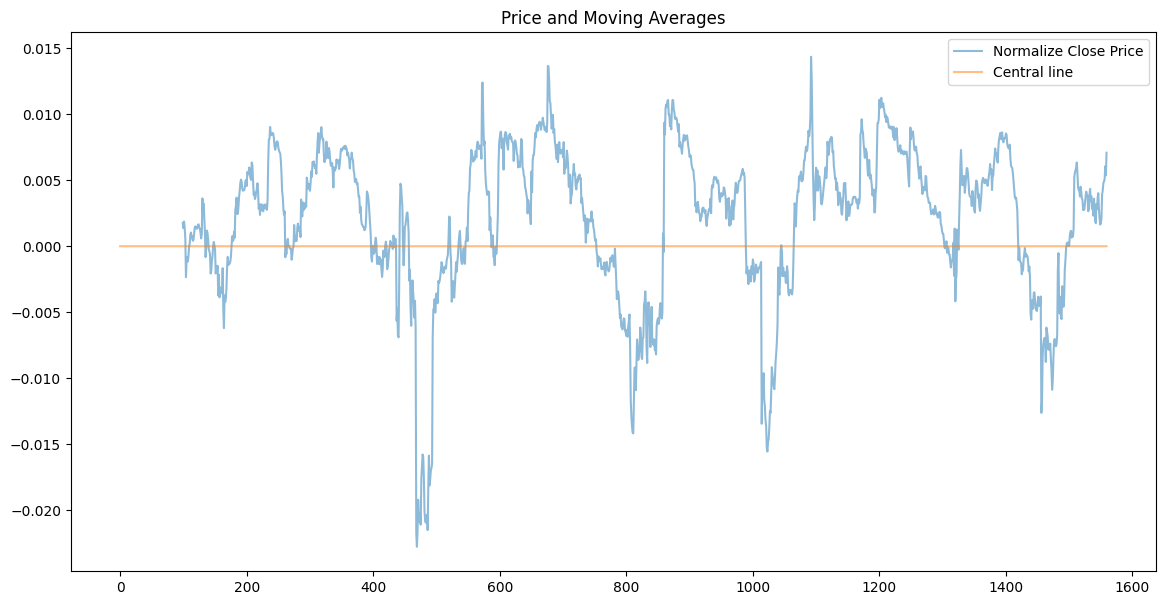

In [188]:
zeros_ls = [0] * len(data_e2_df['nclose'])

plt.figure(figsize=(14, 7))
plt.plot(data_e2_df['nclose'], label='Normalize Close Price', alpha=0.5)
plt.plot(zeros_ls, label='Central line', alpha=0.5)
plt.title(f"Price and Moving Averages")
plt.legend()
plt.show()

# Signal delivery

In [191]:
icols_ls = [
    'index',
    'Datetime',
    'Close',
    'nclose',
    'slope1',
    'signal',
    'order_number',
    'order_step',
    'tendency',
    'strategy_gain',
    'acum_strategy_gain',
    'max_strategy_gain',
    'pp_max_gain',
    'current_return',
    'strategy_return',
    'Cumulative Market Return', 
    'Cumulative Strategy Return'
]

data_e_df[icols_ls].tail(50)

,index,Datetime,Close,nclose,slope1,signal,order_number,order_step,tendency,strategy_gain,acum_strategy_gain,max_strategy_gain,pp_max_gain,current_return,strategy_return,Cumulative Market Return,Cumulative Strategy Return
1510,1510,2025-09-29 14:00:00+00:00,6672.250000,0.005774,0.001359,1,68,20,3,1.160156,59.430176,59.430176,1.000000,0.000174,0.000174,1.066197,1.114401
1511,1511,2025-09-29 14:15:00+00:00,6673.129883,0.005929,0.000233,1,68,21,3,0.879883,60.310059,60.310059,1.000000,0.000132,0.000132,1.066338,1.114547
1512,1512,2025-09-29 14:30:00+00:00,6675.819824,0.006348,0.000248,1,68,22,4,2.689941,63.000000,63.000000,1.000000,0.000403,0.000403,1.066767,1.114997
1513,1513,2025-09-29 14:45:00+00:00,6670.279785,0.005531,-0.000031,1,68,23,-1,-5.540039,57.459961,63.000000,0.912063,-0.000830,-0.000830,1.065882,1.114071
1514,1514,2025-09-29 15:00:00+00:00,6663.279785,0.004499,-0.000511,1,68,24,-2,-7.000000,50.459961,63.000000,0.800952,-0.001049,-0.001049,1.064764,1.112902
1515,1515,2025-09-29 15:15:00+00:00,6661.479980,0.004254,-0.000732,1,68,25,-3,-1.799805,48.660156,63.000000,0.772383,-0.000270,-0.000270,1.064476,1.112602
1516,1516,2025-09-29 15:30:00+00:00,6661.049805,0.004218,-0.000418,1,68,26,-3,-0.430176,48.229980,63.000000,0.765555,-0.000065,-0.000065,1.064407,1.112530
1517,1517,2025-09-29 15:45:00+00:00,6657.850098,0.003766,-0.000224,1,68,27,-3,-3.199707,45.030273,63.000000,0.714766,-0.000480,-0.000480,1.063896,1.111995
1518,1518,2025-09-29 16:00:00+00:00,6662.649902,0.004508,0.000031,1,68,28,1,4.799805,49.830078,63.000000,0.790954,0.000721,0.000721,1.064663,1.112797
1519,1519,2025-09-29 16:15:00+00:00,6660.220215,0.004147,0.000053,1,68,29,2,-2.429688,47.400391,63.000000,0.752387,-0.000365,-0.000365,1.064275,1.112391


In [192]:
icols_ls = [
    'index',
    'Datetime',
    'Close',
    'nclose',
    'slope1',
    'signal',
    'order_number',
    'order_step',
    'tendency',
    'strategy_gain',
    'acum_strategy_gain',
    'max_strategy_gain',
    'pp_max_gain',
    'current_return',
    'strategy_return',
    'Cumulative Market Return', 
    'Cumulative Strategy Return'
]

data_e_df[
    (data_e_df['index'] >= 50)&(data_e_df['index'] <= 100)
][icols_ls]





,index,Datetime,Close,nclose,slope1,signal,order_number,order_step,tendency,strategy_gain,acum_strategy_gain,max_strategy_gain,pp_max_gain,current_return,strategy_return,Cumulative Market Return,Cumulative Strategy Return


In [193]:
try:
    importlib.reload(sys.modules['logics.deliver_last_signal'])
except Exception as e:
    print('NO loaded libraries',  e)
    pass

from logics.deliver_last_signal import deliverLastSignal

params_dict = {}
params_dict['strategy'] = strategy

deliverlastsignal = deliverLastSignal(inputs_dict = outputs_dict, params_dict=params_dict)
deliverlastsignal.run()

outputs_dict = deliverlastsignal.outputs_dict
last_signals_df = outputs_dict['last_signals_df'].copy()
last_signals_df

2025-09-30 22:15:12,676 - logics.deliver_last_signal - INFO - 
WU -> Last stock date: 2025-09-30 19:45:00+00:00
Limit date: 2025-09-30 20:15:00+00:00
Current date: 2025-10-01 03:15:12.676704+00:00

/home/user/Documents/airflow_predictive/dags/src/trading/logics/deliver_last_signal.py:88: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last_signal_df['Market Status'] = 'OPEN'
/home/user/Documents/airflow_predictive/dags/src/trading/logics/deliver_last_signal.py:96: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 

,Datetime,Close,SMA1,slope1,signal,strategy_gain,acum_strategy_gain,Cumulative Market Return,Cumulative Strategy Return,prev_signal,Action,Strategy
0,2025-09-30 19:00:00+00:00,6671.370117,6637.572397,0.000274,1,2.189941,58.550293,1.066056,1.114254,1.0,NA,sp500_15m
1,2025-09-30 19:15:00+00:00,6678.810059,6638.536899,0.000403,1,7.439941,65.990234,1.067245,1.115496,1.0,NA,sp500_15m
2,2025-09-30 19:30:00+00:00,6674.950195,6639.239199,0.000240,1,-3.859863,62.130371,1.066628,1.114852,1.0,NA,sp500_15m
3,2025-09-30 19:45:00+00:00,6687.060059,6640.002100,0.000530,1,12.109863,74.240234,1.068564,1.116874,1.0,NA,sp500_15m


In [194]:
last_signal_df = outputs_dict['last_signal_df'].copy()
last_signal_df

,Datetime,Close,SMA1,slope1,strategy_gain,acum_strategy_gain,Cumulative Market Return,Cumulative Strategy Return,Action,Strategy,Market Status
0,2025-09-30 19:45:00+00:00,6687.060059,6640.0021,0.00053,12.109863,74.240234,1.068564,1.116874,NA,sp500_15m,CLOSED


In [195]:
last_signal = outputs_dict['last_signal'].copy()
last_signal

,Descripción,Valor
0,Datetime,2025-09-30 19:45:00+00:00
1,Close,6687.060059
2,SMA1,6640.0021
3,slope1,0.00053
4,strategy_gain,12.109863
5,acum_strategy_gain,74.240234
6,Cumulative Market Return,1.068564
7,Cumulative Strategy Return,1.116874
8,Action,NA
9,Strategy,sp500_15m


# Total strategy computation process

2025-10-01 12:19:43,957 - helpers.gets_environmet_credentials - INFO - WU-> ENV VARS TAKEN FROM .ENV FILE
2025-10-01 12:19:43,958 - helpers.additional_functionalities - INFO - 
WU-> Function (Getsenvironmentcredentials.run) processed! (elapsed minutes: 0.0)

2025-10-01 12:19:44,013 - googleapiclient.discovery_cache - INFO - file_cache is only supported with oauth2client<4.0.0
2025-10-01 12:19:44,017 - helpers.additional_functionalities - INFO - 
WU-> Function (gdConnection.get_service) processed! (elapsed minutes: 0.001)

2025-10-01 12:19:44,018 - helpers.additional_functionalities - INFO - 
WU-> Function (gdConnection.run) processed! (elapsed minutes: 0.001)

2025-10-01 12:19:45,182 - integrations.gd_connection - INFO - Download 100.
2025-10-01 12:19:45,184 - helpers.additional_functionalities - INFO - 
WU-> Function (gdConnection.download_file) processed! (elapsed minutes: 0.019)

/home/user/Documents/airflow_predictive/dags/src/trading/integrations/gd_connection.py:179: FutureWarnin

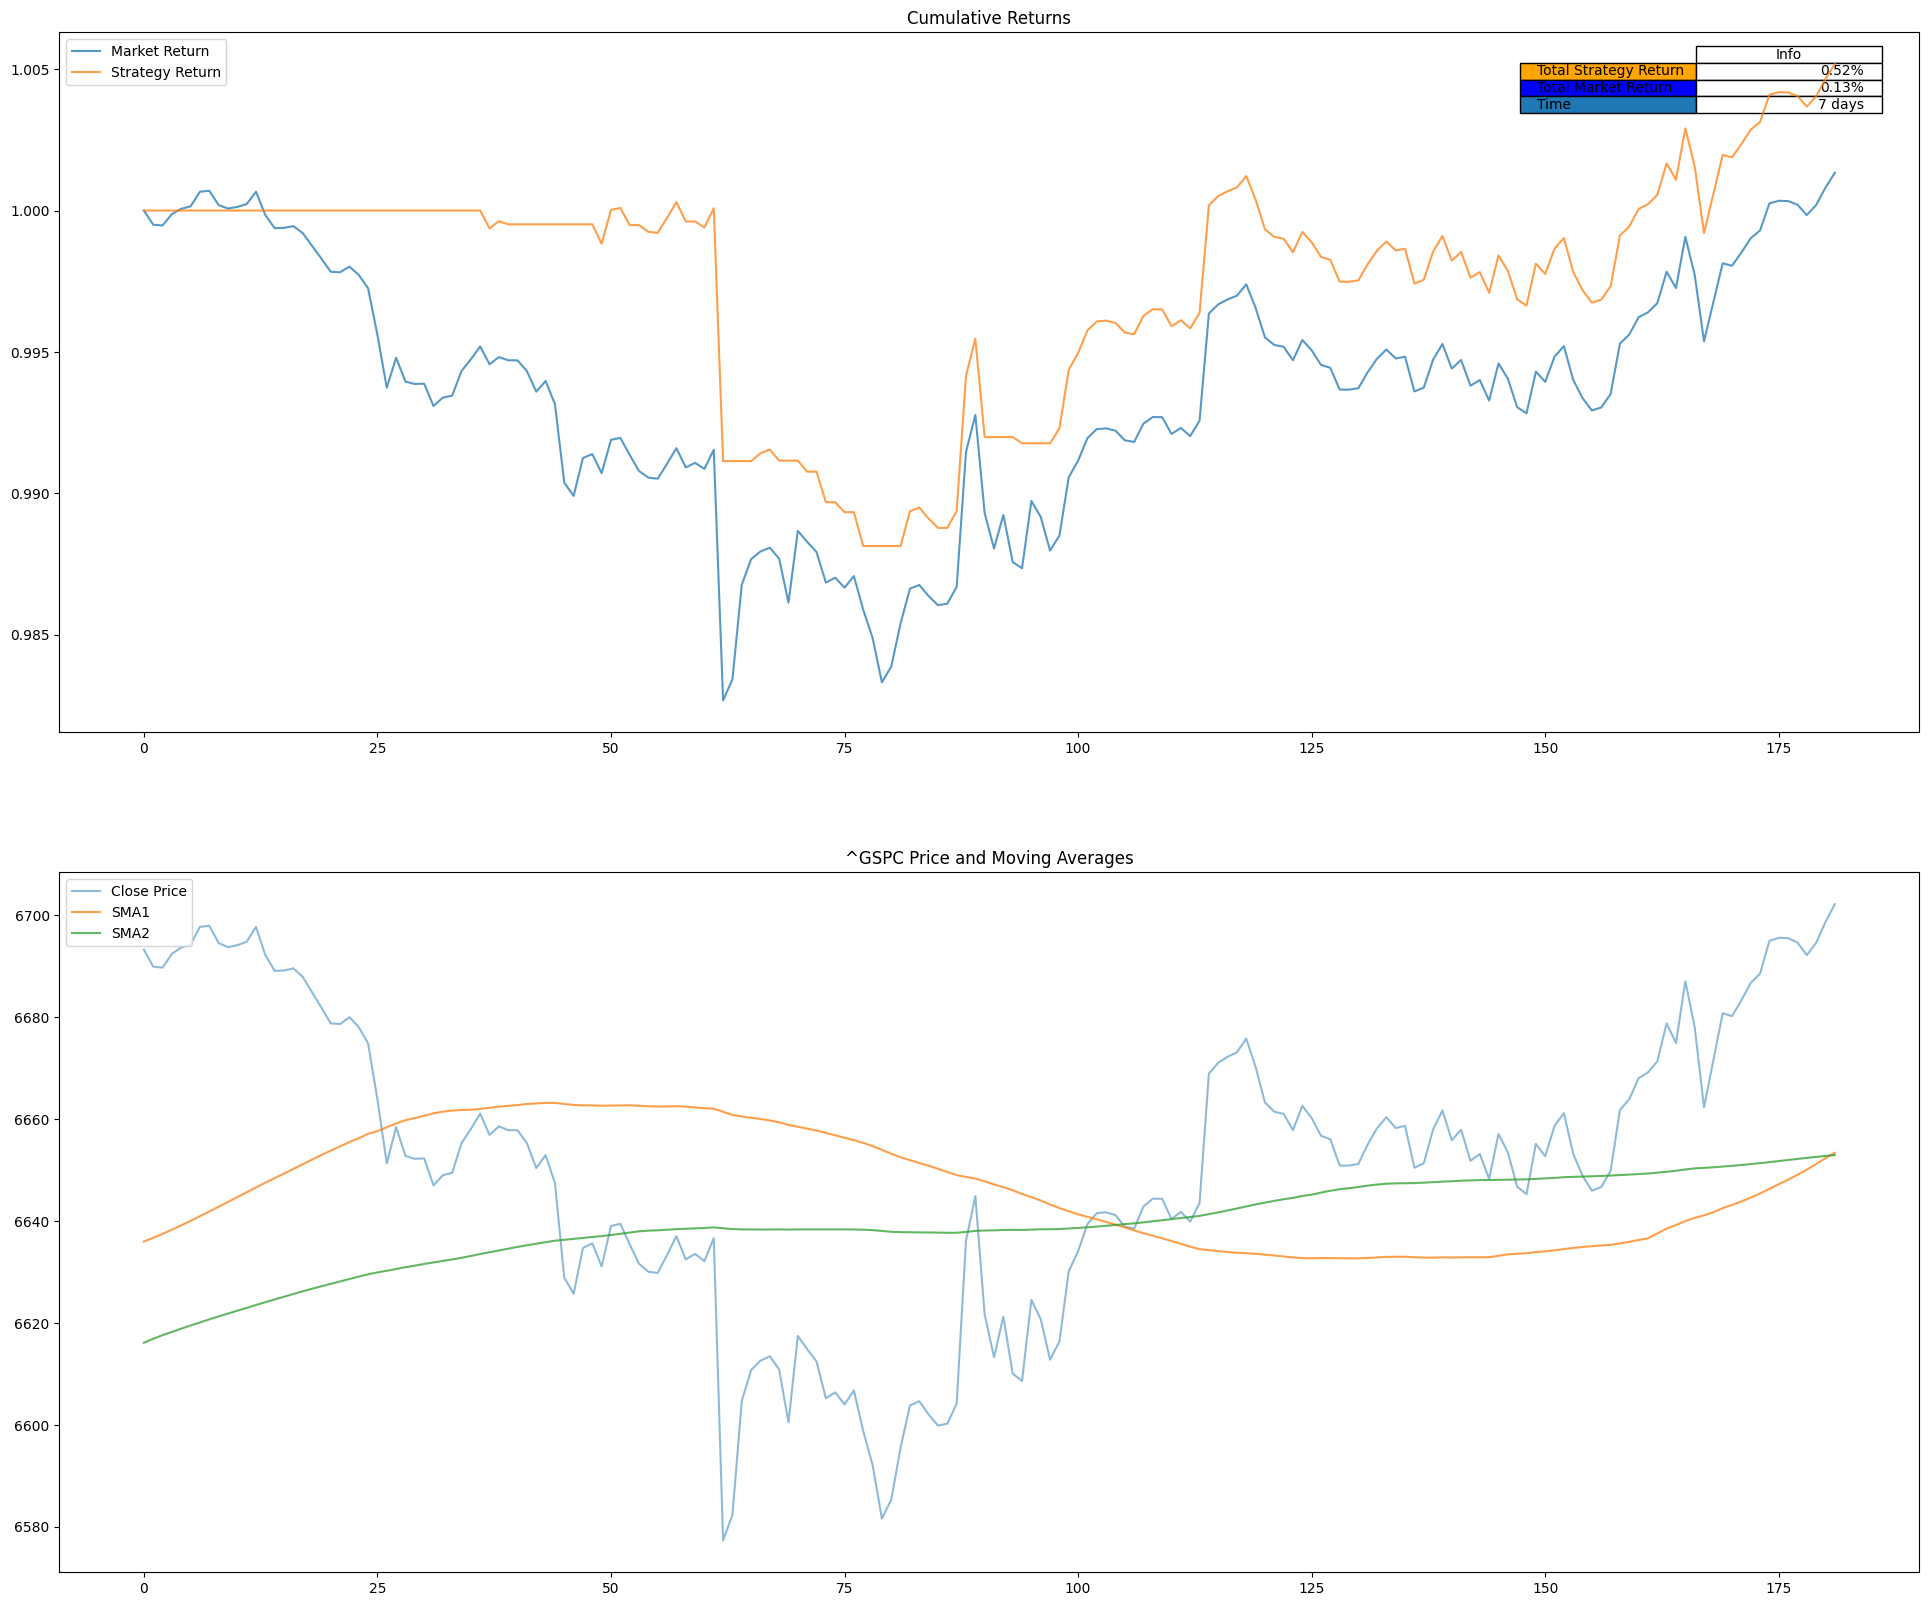

2025-10-01 12:20:08,631 - logics.performance_metrics - INFO - 
WU -> Operations profitability:
   is_profitable  oreders  gain_amount   gain_avg  candles
0          False        8   -81.270020 -10.158752    2.875
1           True        5   116.070312  23.214063   21.000

2025-10-01 12:20:08,633 - logics.performance_metrics - INFO - 
WU -> Strategy total gain points:(34.80029296875)

2025-10-01 12:20:08,634 - logics.performance_metrics - INFO - 
WU -> Market total gain points:(12.2802734375)

2025-10-01 12:20:08,641 - logics.deliver_last_signal - INFO - 
WU -> Last stock date: 2025-10-01 17:15:00+00:00
Limit date: 2025-10-01 20:15:00+00:00
Current date: 2025-10-01 17:20:08.641317+00:00

/home/user/Documents/airflow_predictive/dags/src/trading/logics/deliver_last_signal.py:88: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/

,Datetime,Close,SMA1,slope1,strategy_gain,acum_strategy_gain,Cumulative Market Return,Cumulative Strategy Return,Action,Strategy,Market Status
0,2025-10-01 17:00:00+00:00,6698.709961,6652.355796,0.000052,4.120117,85.890137,1.00081,1.004652,NA,sp500_15m_v2,OPEN


In [231]:
try:
    importlib.reload(sys.modules['SP500_15m_strategy_v2'])
except Exception as e:
    print('NO loaded libraries',  e)
    pass

from SP500_15m_strategy_v2 import sp50015mStrategy

sp50015mstrategy = sp50015mStrategy()
sp50015mstrategy.run()
outputs_dict = sp50015mstrategy.outputs_dict
last_signal_df = outputs_dict['last_signal_df'].copy()
last_signal_df

# Send notification

## Send notification to whatsapp

In [232]:
outputs_dict.keys()

dict_keys(['fcredentials_df', 'connections_ls', 'conns_str', 'env_file', 'env_ls', 'data_e2_df', 'data_e_df', 'imagebuffer', 'last_signals_df', 'last_signal_df', 'last_signal'])

In [233]:
last_signal = outputs_dict['last_signal_df'].copy()

last_signal = last_signal_df.T.reset_index().copy()
rencols_dict = {
    'index':'Descripción',
    1:'Valor',
}
last_signal = last_signal.rename(columns=rencols_dict).copy()
last_signal_tab = tabulate(last_signal, headers = 'keys', tablefmt = 'pretty', showindex=False, colalign=("left", "right"))
last_signal_tab = '```' + last_signal_tab + '```'
last_signal_tab

'```+----------------------------+---------------------------+\n| Descripción                |                         0 |\n+----------------------------+---------------------------+\n| Datetime                   | 2025-10-01 17:00:00+00:00 |\n| Close                      |           6698.7099609375 |\n| SMA1                       |        6652.3557958984375 |\n| slope1                     |     5.179627436091268e-05 |\n| strategy_gain              |              4.1201171875 |\n| acum_strategy_gain         |            85.89013671875 |\n| Cumulative Market Return   |        1.0008097545218222 |\n| Cumulative Strategy Return |         1.004652098019046 |\n| Action                     |                        NA |\n| Strategy                   |              sp500_15m_v2 |\n| Market Status              |                      OPEN |\n+----------------------------+---------------------------+```'

In [223]:
try:
    importlib.reload(sys.modules['integrations.whatsapp_connection'])
except Exception as e:
    print('NO loaded libraries',  e)
    pass

from integrations.whatsapp_connection import whatsappConnection


whatsappconnection = whatsappConnection()

recepient_phone_number = '573104888469'
msg_body = last_signal_tab

whatsappconnection.send_message(msg_body = msg_body, recepient_phone_number=recepient_phone_number)


{"messaging_product":"whatsapp","contacts":[{"input":"573104888469","wa_id":"573104888469"}],"messages":[{"id":"wamid.HBgMNTczMTA0ODg4NDY5FQIAERgSRjcyMTM5NDgxRjcxRDFBNjBGAA=="}]}


In [234]:
try:
    importlib.reload(sys.modules['integrations.whatsapp_connection'])
except Exception as e:
    print('NO loaded libraries',  e)
    pass

from integrations.whatsapp_connection import whatsappConnection


whatsappconnection = whatsappConnection()
imagebuffer = outputs_dict['imagebuffer']

whatsappconnection.send_image(recepient_phone_number=recepient_phone_number, image_buffer = imagebuffer, msg_body=msg_body)

{'id': '1435464070884470'}
{'messaging_product': 'whatsapp', 'contacts': [{'input': '573104888469', 'wa_id': '573104888469'}], 'messages': [{'id': 'wamid.HBgMNTczMTA0ODg4NDY5FQIAERgSQzRGQ0ZDMEU2MjZEOEU4OEQ2AA=='}]}


In [225]:
data_report_df = outputs_dict['data_e_df'].copy()
data_report_df['Datetime'] = data_report_df['Datetime'].apply(lambda x: str(x))
data_report_df['Datetime'] = data_report_df['Datetime'].astype('str')

In [226]:
document_buffer = io.BytesIO()
writer_excel = pd.ExcelWriter(document_buffer, engine='xlsxwriter')
data_report_df.to_excel(writer_excel, sheet_name='Hoja1', index=False)
writer_excel.close()

In [227]:
try:
    importlib.reload(sys.modules['integrations.whatsapp_connection'])
except Exception as e:
    print('NO loaded libraries',  e)
    pass

from integrations.whatsapp_connection import whatsappConnection


whatsappconnection = whatsappConnection()

whatsappconnection.send_file(recepient_phone_number=recepient_phone_number, document_buffer = document_buffer, extension='xlsx')

{'id': '796501512988086'}
{'messaging_product': 'whatsapp', 'contacts': [{'input': '573104888469', 'wa_id': '573104888469'}], 'messages': [{'id': 'wamid.HBgMNTczMTA0ODg4NDY5FQIAERgSMzYyM0JGMjlEMjNERUNFRjhDAA=='}]}


## Send notifications to telegram

In [265]:
try:
    importlib.reload(sys.modules['integrations.telegram_connection'])
except Exception as e:
    print('NO loaded libraries',  e)
    pass

from integrations.telegram_connection import telegramConnection

telegramconnection =telegramConnection()

chat_id = telegramconnection.get_group_chat_id()
chat_id

-4948600790

In [270]:
try:
    importlib.reload(sys.modules['integrations.telegram_connection'])
except Exception as e:
    print('NO loaded libraries',  e)
    pass

from integrations.telegram_connection import telegramConnection

telegramconnection =telegramConnection()

imagebuffer = imagebuffer
market_status_tab2 = tabulate(last_signal, headers = 'keys', tablefmt = 'pretty', showindex=False, colalign=("left", "right"))
message_text = '<pre>' + market_status_tab2 + '</pre>'

telegramconnection.send_image(imagebuffer=imagebuffer, message_text = message_text)

2025-09-26 21:50:42,015 - integrations.telegram_connection - INFO - {'ok': True, 'result': {'message_id': 18, 'from': {'id': 8121151732, 'is_bot': True, 'first_name': 'William bot', 'username': 'WilliamUyasan_bot'}, 'chat': {'id': -4948600790, 'title': 'WU -> Stock positions', 'type': 'group', 'all_members_are_administrators': True, 'accepted_gift_types': {'unlimited_gifts': False, 'limited_gifts': False, 'unique_gifts': False, 'premium_subscription': False}}, 'date': 1758941441, 'photo': [{'file_id': 'AgACAgEAAxkDAAMGaNcJAf2ar3czBUIsROHANM52JpMAAhoLaxtTcrlGpNa8KOxXTf4BAAMCAANzAAM2BA', 'file_unique_id': 'AQADGgtrG1NyuUZ4', 'file_size': 767, 'width': 90, 'height': 64}, {'file_id': 'AgACAgEAAxkDAAMGaNcJAf2ar3czBUIsROHANM52JpMAAhoLaxtTcrlGpNa8KOxXTf4BAAMCAANtAAM2BA', 'file_unique_id': 'AQADGgtrG1NyuUZy', 'file_size': 11323, 'width': 320, 'height': 228}, {'file_id': 'AgACAgEAAxkDAAMGaNcJAf2ar3czBUIsROHANM52JpMAAhoLaxtTcrlGpNa8KOxXTf4BAAMCAAN4AAM2BA', 'file_unique_id': 'AQADGgtrG1NyuUZ9', '

In [235]:
try:
    importlib.reload(sys.modules['integrations.telegram_connection'])
except Exception as e:
    print('NO loaded libraries',  e)
    pass

from integrations.telegram_connection import telegramConnection

telegramconnection =telegramConnection()

telegramconnection.send_file(document_buffer=document_buffer, extension = 'xlsx')

2025-10-01 12:46:50,235 - integrations.telegram_connection - INFO - {'ok': True, 'result': {'message_id': 90, 'from': {'id': 8121151732, 'is_bot': True, 'first_name': 'William bot', 'username': 'WilliamUyasan_bot'}, 'chat': {'id': -4948600790, 'title': 'WU -> Stock positions', 'type': 'group', 'all_members_are_administrators': True, 'accepted_gift_types': {'unlimited_gifts': False, 'limited_gifts': False, 'unique_gifts': False, 'premium_subscription': False}}, 'date': 1759340809, 'document': {'file_name': 'document', 'file_id': 'BQACAgEAAxkDAANaaN1pCUChbF8K_PEGTjMl1MvVycIAAtAHAAKDZPFGwYudbvJJJ5E2BA', 'file_unique_id': 'AgAD0AcAAoNk8UY', 'file_size': 45814}}}


In [188]:
try:
    importlib.reload(sys.modules['integrations.telegram_connection'])
except Exception as e:
    print('NO loaded libraries',  e)
    pass

from integrations.telegram_connection import telegramConnection

telegramconnection =telegramConnection()

chat_id = telegramconnection.send_message(message_text = message_text)
chat_id

2025-09-26 17:55:33,484 - integrations.telegram_connection - INFO - {'ok': True, 'result': {'message_id': 13, 'from': {'id': 8121151732, 'is_bot': True, 'first_name': 'William bot', 'username': 'WilliamUyasan_bot'}, 'chat': {'id': -4948600790, 'title': 'WU -> Stock positions', 'type': 'group', 'all_members_are_administrators': True, 'accepted_gift_types': {'unlimited_gifts': False, 'limited_gifts': False, 'unique_gifts': False, 'premium_subscription': False}}, 'date': 1758927333, 'text': '+----------------------------+---------------------------+\n| Descripción                |                     Valor |\n+----------------------------+---------------------------+\n| Datetime                   | 2025-09-26 15:00:00+00:00 |\n| Close                      |           6608.6298828125 |\n| SMA1                       |         6645.333583984375 |\n| slope1                     |       -2.5169921874996817 |\n| signal                     |                         1 |\n| Cumulative Market Return

## Total notification sending

In [200]:
try:
    importlib.reload(sys.modules['SP500_15m_strategy'])
except Exception as e:
    print('NO loaded libraries',  e)
    pass

from SP500_15m_strategy import sp50015mStrategy

sp50015mstrategy = sp50015mStrategy()

sp50015mstrategy.send_notification(inputs_dict = outputs_dict)

2025-09-30 22:22:55,335 - SP500_15m_strategy - INFO - 

WU -> MARKET CLOSED, PROCESS TERMINATED!




# Total process

2025-09-30 22:23:24,966 - helpers.gets_environmet_credentials - INFO - WU-> ENV VARS TAKEN FROM .ENV FILE
2025-09-30 22:23:24,969 - helpers.additional_functionalities - INFO - 
WU-> Function (Getsenvironmentcredentials.run) processed! (elapsed minutes: 0.0)

2025-09-30 22:23:25,043 - googleapiclient.discovery_cache - INFO - file_cache is only supported with oauth2client<4.0.0
2025-09-30 22:23:25,046 - helpers.additional_functionalities - INFO - 
WU-> Function (gdConnection.get_service) processed! (elapsed minutes: 0.001)

2025-09-30 22:23:25,048 - helpers.additional_functionalities - INFO - 
WU-> Function (gdConnection.run) processed! (elapsed minutes: 0.001)

2025-09-30 22:23:26,123 - integrations.gd_connection - INFO - Download 100.
2025-09-30 22:23:26,125 - helpers.additional_functionalities - INFO - 
WU-> Function (gdConnection.download_file) processed! (elapsed minutes: 0.018)

/home/user/Documents/airflow_predictive/dags/src/trading/integrations/gd_connection.py:179: FutureWarnin

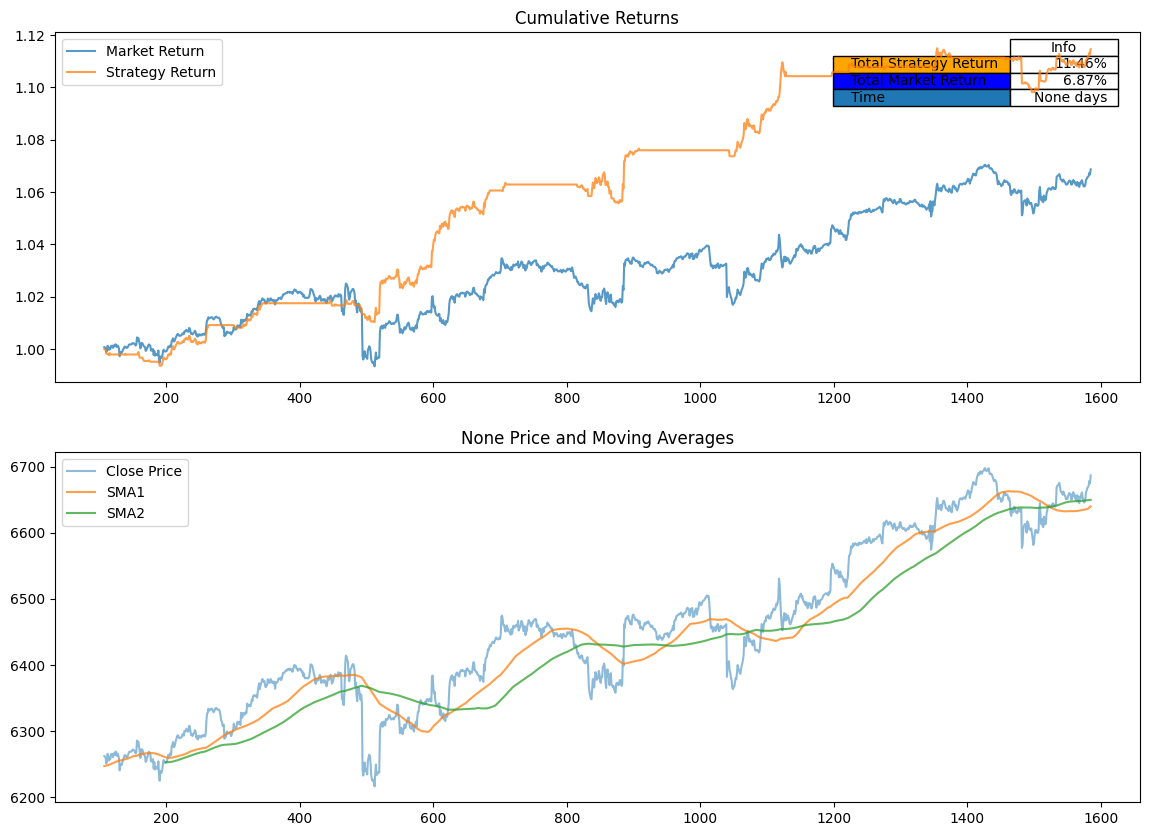

2025-09-30 22:23:50,331 - logics.performance_metrics - INFO - 
WU -> Operations profitability:
   is_profitable  oreders  gain_amount   gain_avg    candles
0          False       43  -282.200195  -6.562795   3.116279
1           True       26   977.520020  37.596924  21.192308

2025-09-30 22:23:50,332 - logics.performance_metrics - INFO - 
WU -> Strategy total gain points:(695.31982421875)

2025-09-30 22:23:50,333 - logics.performance_metrics - INFO - 
WU -> Market total gain points:(425.85986328125)

2025-09-30 22:23:50,338 - logics.deliver_last_signal - INFO - 
WU -> Last stock date: 2025-09-30 19:45:00+00:00
Limit date: 2025-09-30 20:15:00+00:00
Current date: 2025-10-01 03:23:50.338939+00:00

/home/user/Documents/airflow_predictive/dags/src/trading/logics/deliver_last_signal.py:88: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

In [201]:
try:
    importlib.reload(sys.modules['logics.deliver_last_signal'])
    importlib.reload(sys.modules['SP500_15m_strategy_v2'])
except Exception as e:
    print('NO loaded libraries',  e)
    pass

from SP500_15m_strategy_v2 import sp50015mStrategy

sp50015mstrategy = sp50015mStrategy()
sp50015mstrategy.run()
sp50015mstrategy.send_notification(inputs_dict = outputs_dict)

In [283]:
outputs_dict = sp50015mstrategy.outputs_dict
outputs_dict.keys()

dict_keys(['stock_df', 'data_e2_df', 'data_e_df', 'imagebuffer', 'last_signals_df', 'last_signal_df'])

In [284]:

last_signal_df

,Datetime,Close,SMA1,slope1,strategy_gain,acum_strategy_gain,Cumulative Market Return,Cumulative Strategy Return,Action,Strategy,Market Status
0,2025-09-26 19:45:00+00:00,6643.540039,6634.503896,0.746973,0.0,-2.589844,1.004111,1.003954,NA,sp500_15m,CLOSE


In [285]:

if market_status != 'CLOSE'

0    CLOSE
Name: Market Status, dtype: object

# Observations

In [36]:
icols_ls = ['Datetime','Close', 'Open_adj', 'SMA1','sma1_diff', 'signal',
       'order_number', 'order_step', 'strategy_gain', 'pp_change_gain', 'order_gain_balance', 'order_loss_balance',
       'acum_strategy_gain', 'pp_strategy_gain','slope1','tendency',
       'current_return','strategy_return', 'Cumulative Market Return', 'Cumulative Strategy Return']

#data_e_df[icols_ls]

data_e_df[
    #data_e_df['order_number'].isin([1,2])
    #data_e2_df['order_number'].isin([69,70])
    #data_e2_df['signal']==-1
    (data_e_df['index']>=350)&(data_e_df['index']<=400)
][icols_ls]

,Datetime,Close,Open_adj,SMA1,sma1_diff,signal,order_number,order_step,strategy_gain,pp_change_gain,order_gain_balance,order_loss_balance,acum_strategy_gain,pp_strategy_gain,slope1,tendency,current_return,strategy_return,Cumulative Market Return,Cumulative Strategy Return
350,2025-07-21 19:30:00+00:00,6309.370117,6314.839844,6291.810010,17.560107,0,34,12,-0.000000,0.000000,1.560059,-2.060059,-0.500000,-0.000079,-4.652002,-6,-0.000866,-0.000000,1.013101,1.014203
351,2025-07-21 19:45:00+00:00,6307.459961,6309.370117,6292.426709,15.033252,0,34,13,-0.000000,0.000000,1.560059,-2.060059,-0.500000,-0.000079,-3.307031,-6,-0.000303,-0.000000,1.012794,1.014203
352,2025-07-22 13:30:00+00:00,6309.669922,6307.459961,6293.075410,16.594512,0,34,14,0.000000,-0.000000,1.560059,-2.060059,-0.500000,-0.000079,-1.741992,-6,0.000350,0.000000,1.013149,1.014203
353,2025-07-22 13:45:00+00:00,6288.279785,6309.669922,6293.534507,-5.254722,0,34,15,-0.000000,0.000000,1.560059,-2.060059,-0.500000,-0.000079,-6.106104,-7,-0.003390,-0.000000,1.009715,1.014203
354,2025-07-22 14:00:00+00:00,6291.040039,6288.279785,6293.903906,-2.863867,0,34,16,0.000000,-0.000000,1.560059,-2.060059,-0.500000,-0.000079,-7.064990,-8,0.000439,0.000000,1.010158,1.014203
355,2025-07-22 14:15:00+00:00,6290.879883,6291.040039,6294.469204,-3.589321,0,34,17,-0.000000,0.000000,1.560059,-2.060059,-0.500000,-0.000079,-5.360986,-8,-0.000025,-0.000000,1.010132,1.014203
356,2025-07-22 14:30:00+00:00,6297.319824,6290.879883,6295.195303,2.124521,1,35,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.695996,1,0.001024,0.000000,1.011166,1.014203
357,2025-07-22 14:45:00+00:00,6299.310059,6297.319824,6295.789502,3.520557,1,35,2,1.990234,0.000000,1.990234,0.000000,1.990234,0.000316,3.125000,2,0.000316,0.000316,1.011486,1.014524
358,2025-07-22 15:00:00+00:00,6296.459961,6299.310059,6296.391104,0.068857,0,35,3,-2.850098,-1.432041,1.990234,-2.850098,-0.859863,-0.000137,1.873047,2,-0.000452,-0.000452,1.011028,1.014065
359,2025-07-22 15:15:00+00:00,6296.979980,6296.459961,6296.987202,-0.007222,0,35,4,0.000000,-0.000000,1.990234,-2.850098,-0.859863,-0.000137,-0.386963,-1,0.000083,0.000000,1.011112,1.014065
